<a href="https://colab.research.google.com/github/Bhavi663/resume/blob/main/3D_Scatter_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

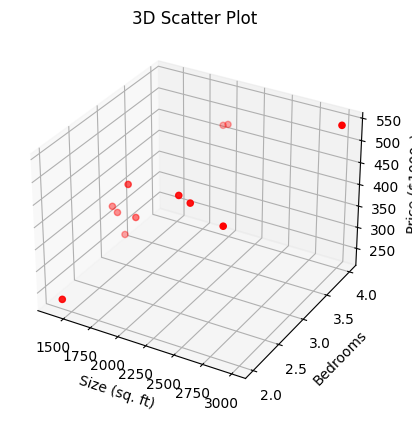

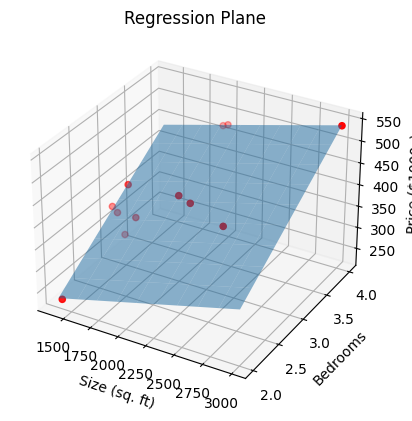

R-squared: 0.8798232286500599


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
data = np.array([
    [2104, 3, 400],
    [1600, 3, 330],
    [2400, 3, 369],
    [1416, 2, 232],
    [3000, 4, 540],
    [1985, 4, 475],
    [1534, 3, 402],
    [1427, 3, 329],
    [1380, 3, 340],
    [1494, 3, 282],
    [1940, 4, 470],
    [2000, 3, 410]
])

# Splitting features and target variable
X = data[:, :2]  # Features: size and number of bedrooms
y = data[:, 2]   # Target variable: price

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Size (sq. ft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price ($1000s)')
plt.title('3D Scatter Plot')
plt.show()

# Fit the model
model = LinearRegression().fit(X, y)

# Visualize the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create grid of feature values
x1_grid, x2_grid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                               np.linspace(X[:, 1].min(), X[:, 1].max(), 10))

# Predict the values over the grid
y_pred_grid = model.predict(np.array([x1_grid.flatten(), x2_grid.flatten()]).T).reshape(x1_grid.shape)

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5)

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')

ax.set_xlabel('Size (sq. ft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price ($1000s)')
plt.title('Regression Plane')
plt.show()

# Calculate R-squared
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)